In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
base_dir = 'drive/MyDrive/Thesis/Data/annotated/'

In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv(base_dir + "dataset.csv", index_col=0)

In [5]:
dataset.head()

,text,label
0,زن و بچه گناهی ندارن عموما ، چرا میگی اصل ا...,Nonpolitical
1,بعد شستن ظرفا میگی اخیش تموم شد، با یه فنجون چ...,Nonpolitical
2,كير خر ! چيش خنده داره ؟ دختررو ميزنه تو ميخ...,Nonpolitical
3,آینده‌ی کسب و کارهای آینده به تلاش ما برای افز...,Nonpolitical
4,یکبارشهامت داشته باشید و صریح به مخاطبین پاس...,Political


In [6]:
dataset.groupby(['label']).count()

,text
label,
Nonpolitical,7287
Political,2713


In [7]:
! pip install --quiet python-bidi
! pip install --quiet arabic-reshaper 

In [8]:
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper

reshaped_text = lambda text: get_display(arabic_reshaper.reshape(text))

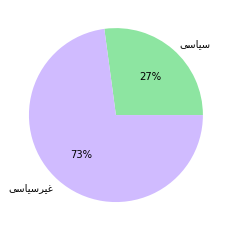

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = [reshaped_text("سیاسی"), reshaped_text("غیرسیاسی")]
data = [2713, 7287]
#define Seaborn color palette to use
colors = [sns.color_palette('pastel')[2], sns.color_palette('pastel')[4]]
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

train_ratio = 0.75
validation_ratio = 0.10
test_ratio = 0.15


x_train, x_test, y_train, y_test = train_test_split(dataset["text"], dataset["label"], test_size=1 - train_ratio)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

In [11]:
!pip install --quiet -U adapter-transformers
!pip install --quiet datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 106.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 16.7 MB/s eta 0:00:00


In [12]:
import datasets
from datasets import Dataset, DatasetDict


train_df = pd.DataFrame({"sentence1": list(x_train), "label": list(y_train)})
validation_df = pd.DataFrame({"sentence1": list(x_val), "label": list(y_val)})
test_df = pd.DataFrame({"sentence1": list(x_test), "label": list(y_test)})

train, validation, test = Dataset.from_pandas(train_df), Dataset.from_pandas(validation_df), Dataset.from_pandas(test_df)


hf_dataset = DatasetDict()

hf_dataset['train'] = train
hf_dataset['validation'] = validation
hf_dataset['test'] = test

hf_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'label'],
        num_rows: 7500
    })
    validation: Dataset({
        features: ['sentence1', 'label'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['sentence1', 'label'],
        num_rows: 1500
    })
})

In [13]:
test_df.groupby(['label']).count()

,sentence1
label,
Nonpolitical,1091
Political,409


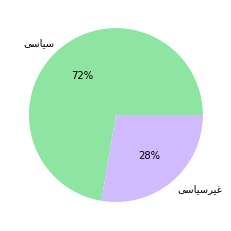

In [14]:
labels = [reshaped_text("سیاسی"), reshaped_text("غیرسیاسی")]
data = [1085, 415]
#define Seaborn color palette to use
colors = [sns.color_palette('pastel')[2], sns.color_palette('pastel')[4]]
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [16]:
train_df.to_csv(base_dir + "train.csv", index_label="idx")
validation_df.to_csv(base_dir + "validation.csv", index_label="idx")
test_df.to_csv(base_dir + "test.csv", index_label="idx")